In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### Load fearues and labels

In [8]:
X=np.load("data/X.npy")
y=np.load("data/y.npy")

#### Split training and test data

In [262]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#### Apply standardization on features for fast computation

In [263]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [264]:
X_test=scaler.transform(X_test)

In [265]:
print("X Train: ",X_train.shape)
print("y Train: ",y_train.shape)
print("X Test: ",X_test.shape)
print("y Test: ",y_test.shape)

X Train:  (4000, 400)
y Train:  (4000, 1)
X Test:  (1000, 400)
y Test:  (1000, 1)


In [266]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


#### Define Neural Model 

In [331]:
model = Sequential([
    Dense(400, input_dim=X_train.shape[1],activation='relu'),
    Dropout(0.1),
    Dense(250,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax')
])

In [332]:
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_89 (Dense)                     │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 250)                 │         100,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,160 (1.00 MB)

 Trainable params: 263,160 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [333]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 


In [334]:
model.fit(X_train,y_train,batch_size=48,epochs=40,validation_split=0.2)

Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6526 - loss: 1.1632 - val_accuracy: 0.9062 - val_loss: 0.3350
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9339 - loss: 0.2262 - val_accuracy: 0.9225 - val_loss: 0.2896
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9667 - loss: 0.1229 - val_accuracy: 0.9350 - val_loss: 0.2594
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9721 - loss: 0.0859 - val_accuracy: 0.9362 - val_loss: 0.2484
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9902 - loss: 0.0485 - val_accuracy: 0.9250 - val_loss: 0.2741
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9931 - loss: 0.0346 - val_accuracy: 0.9300 - val_loss: 0.2768
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9972 - loss: 0.0250 - val_accuracy: 0.9413 - val_loss: 0.2991
Epoch 8/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9950 - loss: 0.0217 - val_accuracy: 0.9350 - val_loss

### Model Evaluations

In [338]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 1.1347
Accuracy: 0.9319999814033508


In [339]:
y_pred = model.predict(X_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [340]:
y_pred.shape

(1000, 10)

In [341]:
y_pred=np.argmax(y_pred,axis=1)


In [342]:
y_pred[:5]

array([6, 9, 7, 6, 3], dtype=int64)

In [343]:
y_test[:5].reshape(1,-1)

array([[5, 9, 7, 6, 5]], dtype=uint8)



Classification Score               precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.92      0.99      0.96        97
           2       0.89      0.90      0.90       100
           3       0.96      0.94      0.95       118
           4       0.95      0.91      0.93        91
           5       0.95      0.92      0.94       103
           6       0.95      0.96      0.96        84
           7       0.92      0.89      0.90       114
           8       0.93      0.94      0.94       102
           9       0.88      0.89      0.89        91

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



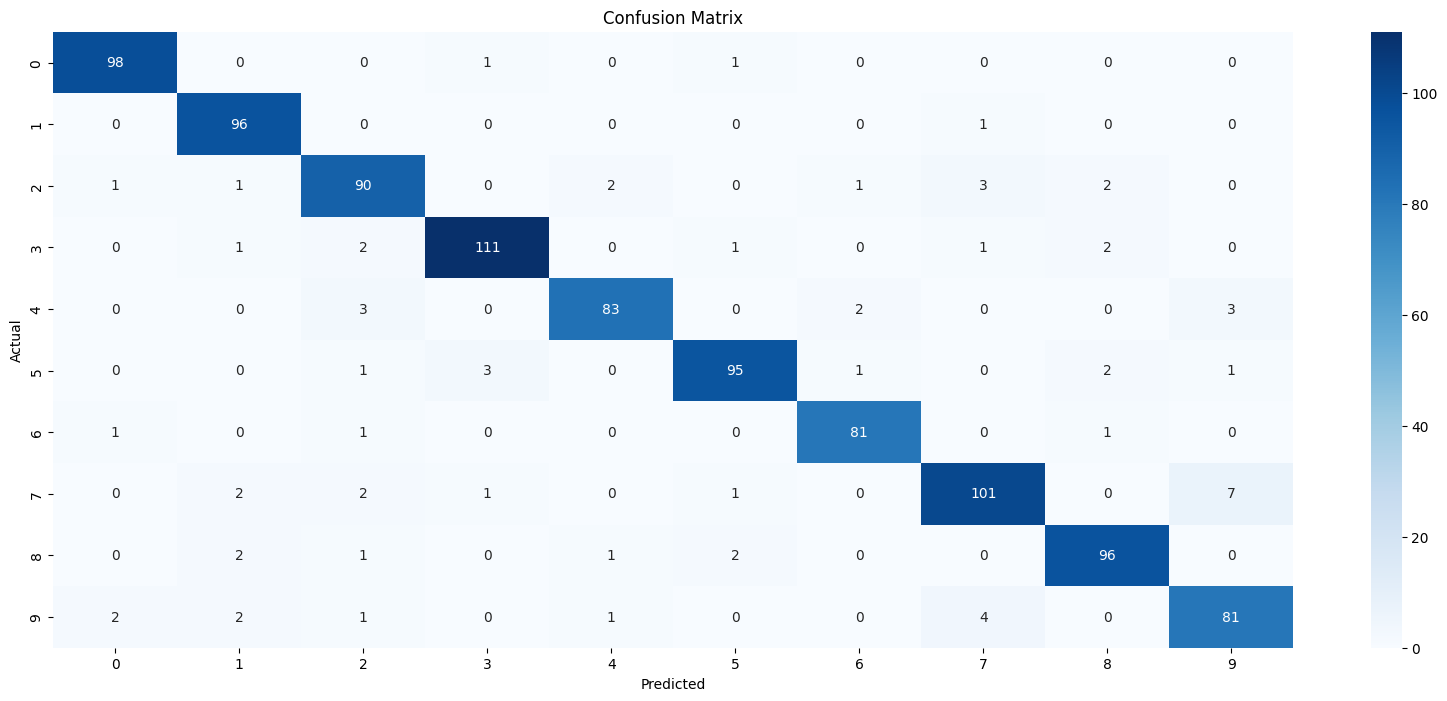

In [344]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
class_score=classification_report(y_test, y_pred)

print("\n\nClassification Score",class_score)

plt.figure(figsize=(20, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2','3','4','5','6','7','8','9'], yticklabels=['0', '1', '2','3','4','5','6','7','8','9'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

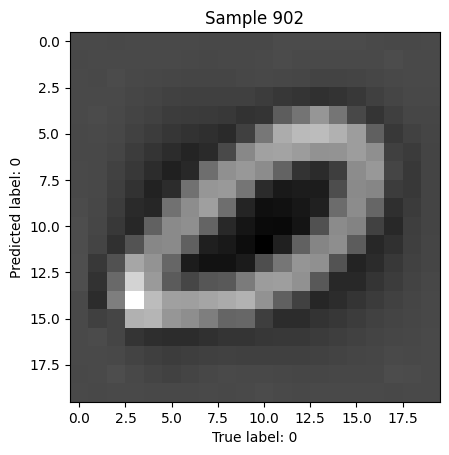

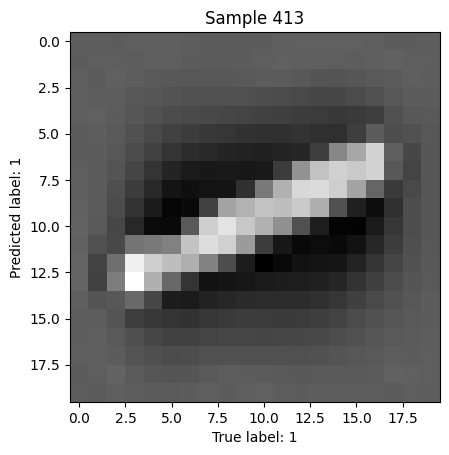

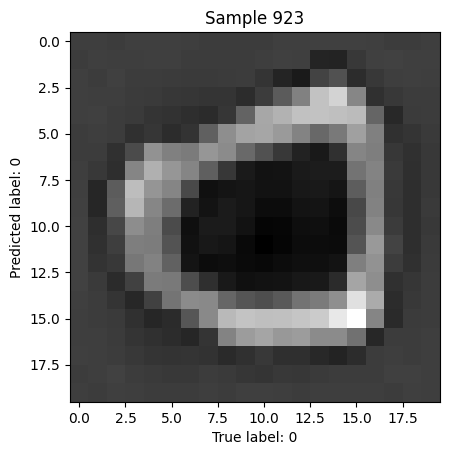

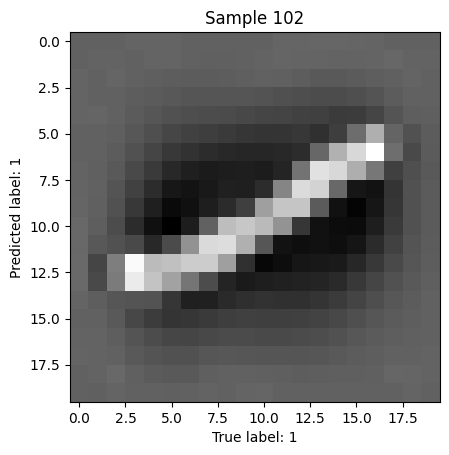

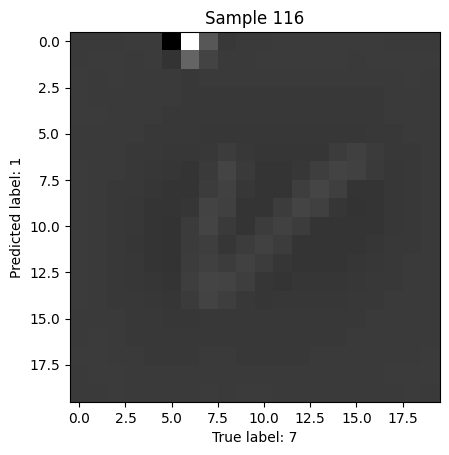

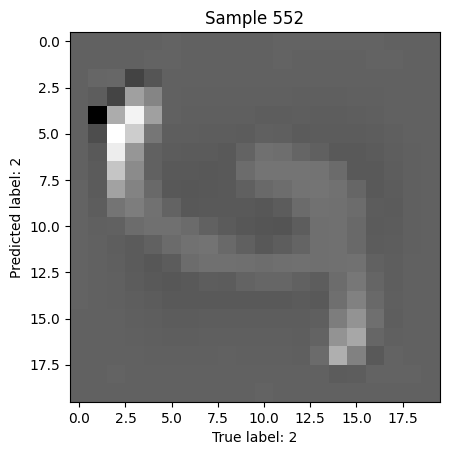

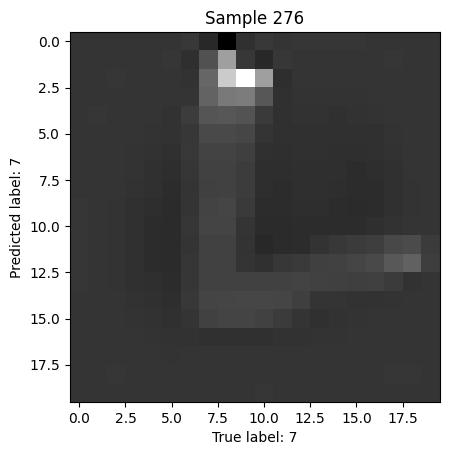

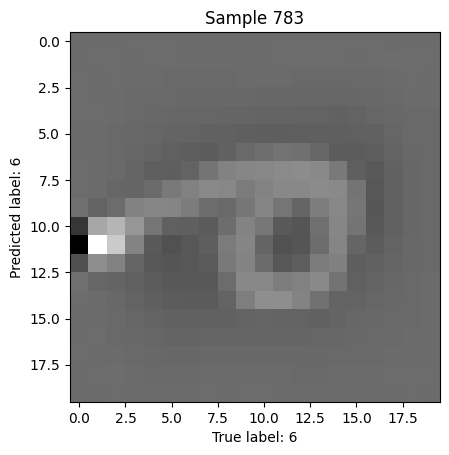

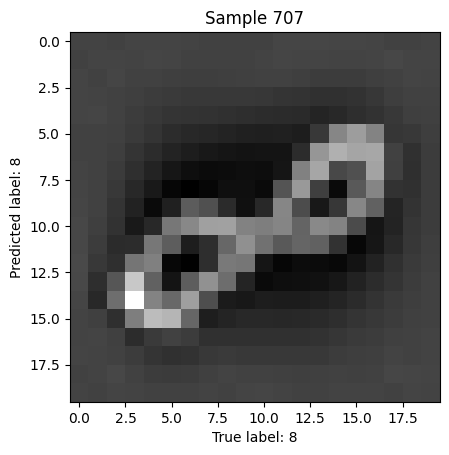

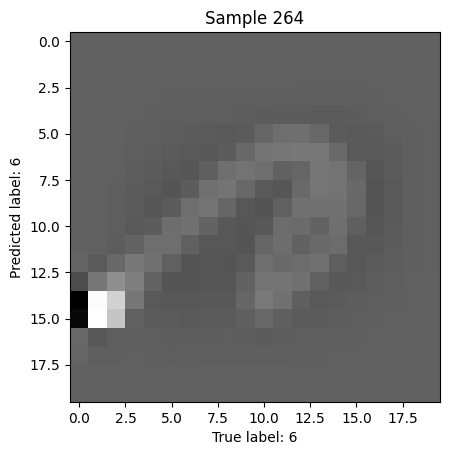

In [345]:
for i in range(10):
    index=np.random.randint(0, X_test.shape[0])
    true_label=y_test[index]
    pred_label=y_pred[index]
    plt.imshow(X_test[index].reshape((20,20)),cmap='gray')
    plt.xlabel(f'True label: {true_label[0]}')
    plt.ylabel(f'Predicted label: {pred_label}')
    plt.title(f'Sample {index}')
    plt.show()